In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
import tensorflow as tf

# Partie 1: Classification avec données tres loins

# Data Generation

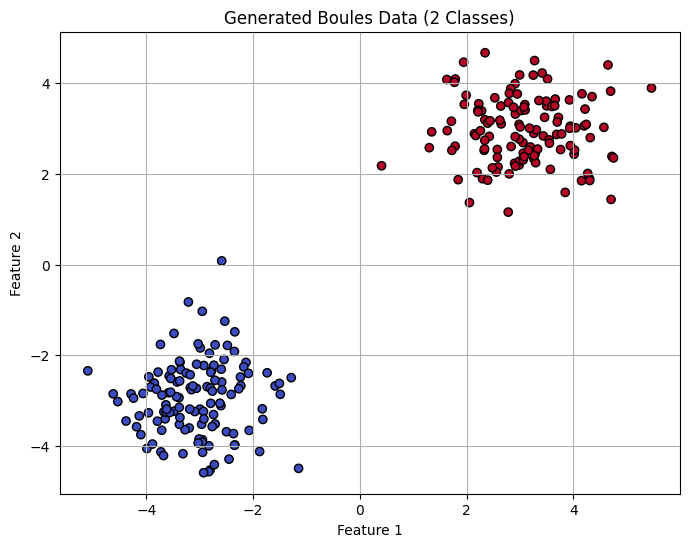

In [7]:
# Generate 2 classes of data with specified centers
X, y = make_blobs(n_samples=250, centers=[(-3, -3), (3, 3)],
                  n_features=2, cluster_std=0.8, random_state=42)

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Generated Boules Data (2 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [8]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Classification with ReLU Activation

In [9]:
# Initialize and train the MLPClassifier with ReLU activation
model_relu = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu',
                           max_iter=1000, random_state=42)
model_relu.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_relu = model_relu.predict(X_test)
accuracy_relu = accuracy_score(y_test, y_pred_relu)

print(f"Accuracy with ReLU: {accuracy_relu * 100:.2f}%")

Accuracy with ReLU: 100.00%


# Classification with Sigmoid Activation

In [10]:
# Initialize and train the MLPClassifier with sigmoid ('logistic') activation
model_sigmoid = MLPClassifier(hidden_layer_sizes=(10, 5), activation='logistic',
                              max_iter=1000, random_state=42)
model_sigmoid.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_sigmoid = model_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

print(f"Accuracy with Sigmoid: {accuracy_sigmoid * 100:.2f}%")

Accuracy with Sigmoid: 100.00%


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


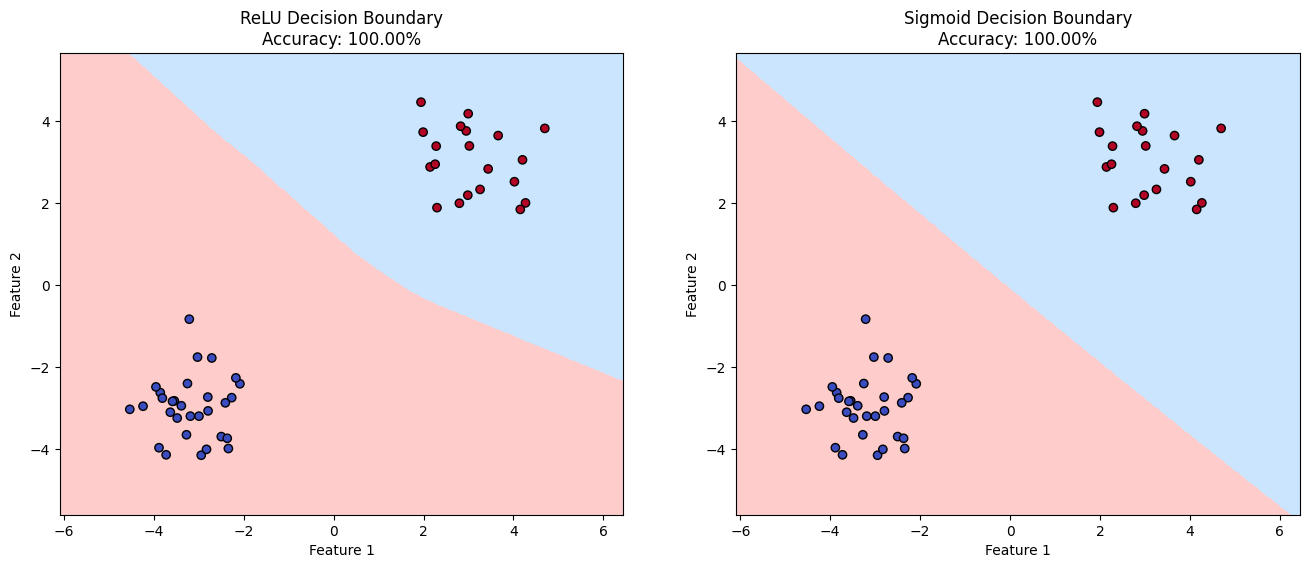

In [11]:
# Helper function to plot decision boundaries
def plot_decision_boundary(model, X, y, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFCCCC', '#CCE5FF']) # Red/Blue areas
    cmap_bold = ['#FF0000', '#0000FF'] # Red/Blue points

    ax.contourf(xx, yy, Z, cmap=cmap_light)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Create a figure to compare both models
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_decision_boundary(model_relu, X, y, axes[0], f'ReLU Decision Boundary\nAccuracy: {accuracy_relu*100:.2f}%')
plot_decision_boundary(model_sigmoid, X, y, axes[1], f'Sigmoid Decision Boundary\nAccuracy: {accuracy_sigmoid*100:.2f}%')

plt.show()

# Partie 2: Classification avec donnés proches

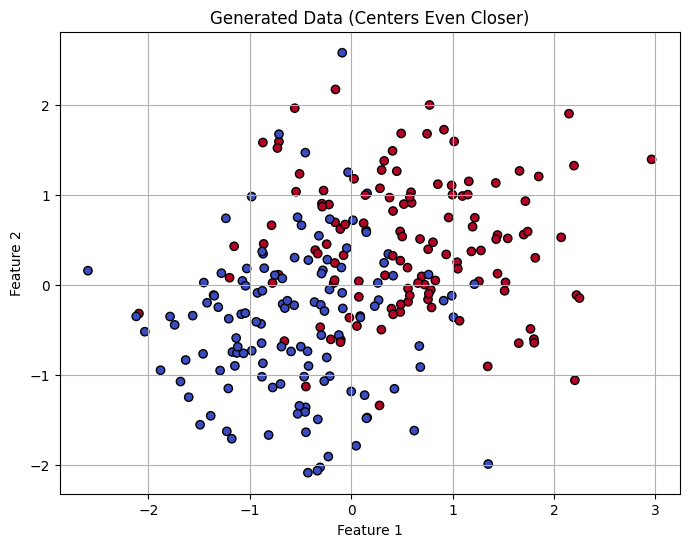

In [13]:
# Case 2: Centers even closer
X2, y2 = make_blobs(n_samples=250, centers=[(-0.5, -0.5), (0.5, 0.5)],
                  n_features=2, cluster_std=0.8, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Generated Data (Centers Even Closer)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [ ]:
# Split data for Case 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize and train the MLPClassifier with ReLU activation for Case 2
model2_relu = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu',
                           max_iter=1000, random_state=42)
model2_relu.fit(X2_train, y2_train)

# Make predictions and calculate accuracy for Case 2 (ReLU)
y2_pred_relu = model2_relu.predict(X2_test)
accuracy2_relu = accuracy_score(y2_test, y2_pred_relu)

print(f"Accuracy with ReLU (Case 2): {accuracy2_relu * 100:.2f}%")

# Initialize and train the MLPClassifier with sigmoid ('logistic') activation for Case 2
model2_sigmoid = MLPClassifier(hidden_layer_sizes=(10, 5), activation='logistic',
                              max_iter=1000, random_state=42)
model2_sigmoid.fit(X2_train, y2_train)

# Make predictions and calculate accuracy for Case 2 (Sigmoid)
y2_pred_sigmoid = model2_sigmoid.predict(X2_test)
accuracy2_sigmoid = accuracy_score(y2_test, y2_pred_sigmoid)

print(f"Accuracy with Sigmoid (Case 2): {accuracy2_sigmoid * 100:.2f}%")

Accuracy with ReLU (Case 2): 84.00%
Accuracy with Sigmoid (Case 2): 84.00%


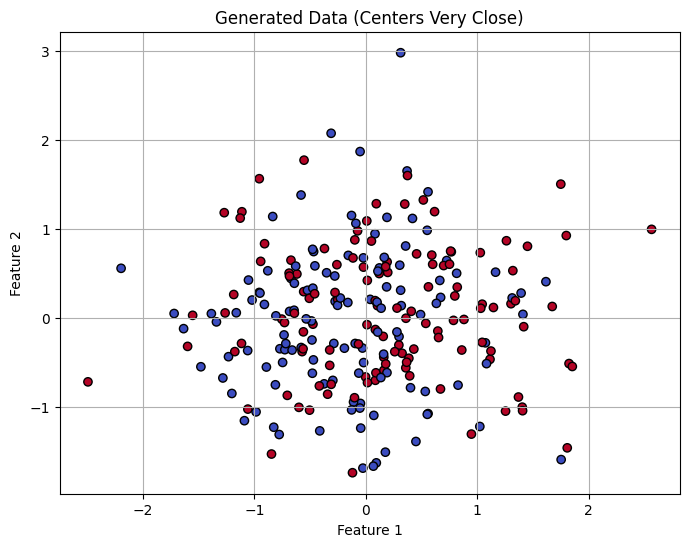

In [14]:
# Case 3: Centers very close
X3, y3 = make_blobs(n_samples=250, centers=[(-0.1, -0.1), (0.1, 0.1)],
                  n_features=2, cluster_std=0.8, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Generated Data (Centers Very Close)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [ ]:
# Split data for Case 3
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize and train the MLPClassifier with ReLU activation for Case 3
model3_relu = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu',
                           max_iter=1000, random_state=42)
model3_relu.fit(X3_train, y3_train)

# Make predictions and calculate accuracy for Case 3 (ReLU)
y3_pred_relu = model3_relu.predict(X3_test)
accuracy3_relu = accuracy_score(y3_test, y3_pred_relu)

print(f"Accuracy with ReLU (Case 3): {accuracy3_relu * 100:.2f}%")

# Initialize and train the MLPClassifier with sigmoid ('logistic') activation for Case 3
model3_sigmoid = MLPClassifier(hidden_layer_sizes=(10, 5), activation='logistic',
                              max_iter=1000, random_state=42)
model3_sigmoid.fit(X3_train, y3_train)

# Make predictions and calculate accuracy for Case 3 (Sigmoid)
y3_pred_sigmoid = model3_sigmoid.predict(X3_test)
accuracy3_sigmoid = accuracy_score(y3_test, y3_pred_sigmoid)

print(f"Accuracy with Sigmoid (Case 3): {accuracy3_sigmoid * 100:.2f}%")

Accuracy with ReLU (Case 3): 64.00%
Accuracy with Sigmoid (Case 3): 40.00%


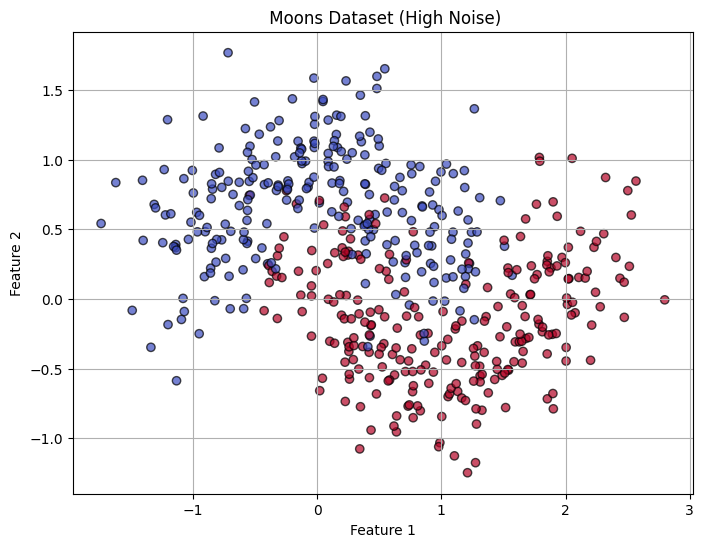

In [33]:
# Generate a difficult moons dataset with significant noise
X4, y4 = make_moons(n_samples=500, noise=0.3, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Plot the data to see how challenging it is
plt.figure(figsize=(8, 6))
plt.scatter(X4[:, 0], X4[:, 1], c=y4, cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.7)
plt.title(' Moons Dataset (High Noise)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [35]:
# Split data for Case 3
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Initialize and train the MLPClassifier with ReLU activation for Case 3
model3_relu = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu',
                           max_iter=1000, random_state=42)
model3_relu.fit(X4_train, y4_train)

# Make predictions and calculate accuracy for Case 3 (ReLU)
y4_pred_relu = model3_relu.predict(X4_test)
accuracy4_relu = accuracy_score(y4_test, y4_pred_relu)

print(f"Accuracy with ReLU (Case 4): {accuracy4_relu * 100:.2f}%")

# Initialize and train the MLPClassifier with sigmoid ('logistic') activation for Case 3
model3_sigmoid = MLPClassifier(hidden_layer_sizes=(10, 5), activation='logistic',
                              max_iter=1000, random_state=42)
model3_sigmoid.fit(X4_train, y4_train)

# Make predictions and calculate accuracy for Case 3 (Sigmoid)
y4_pred_sigmoid = model3_sigmoid.predict(X4_test)
accuracy4_sigmoid = accuracy_score(y4_test, y4_pred_sigmoid)

print(f"Accuracy with Sigmoid (Case 4): {accuracy4_sigmoid * 100:.2f}%")

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy with ReLU (Case 4): 90.00%
Accuracy with Sigmoid (Case 4): 84.00%


# Partie 3: Classification avec Tensor Flow

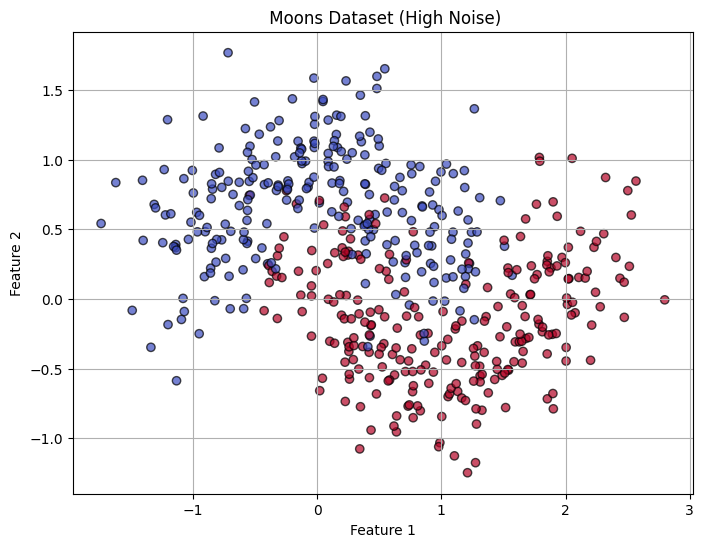

In [26]:
# Generate a difficult moons dataset with significant noise
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data to see how challenging it is
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.7)
plt.title(' Moons Dataset (High Noise)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

This architecture is a balanced recipe:

- Depth (3 hidden layers) provides the power to learn the complex, non-linear moon shape.

- Width (64 -> 32 neurons) provides the capacity to learn enough features at each stage.

- Dropout provides the regularization to ensure the model learns the true underlying pattern, not just the noise.

In [27]:
# Build a deeper and more robust model for the complex data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dropout(0.2), # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Final output layer
])

# Compile the model
# Using a lower learning rate can help with noisy data
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model's architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,465 (25.25 KB)

 Trainable params: 6,465 (25.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Train the model for more epochs to learn the complex boundary
print("\nTraining the model on the hard moons dataset...")
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model on the unseen test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {accuracy * 100:.2f}%")


Training the model on the hard moons dataset...

Final Test Accuracy: 88.00%


1740/1740 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


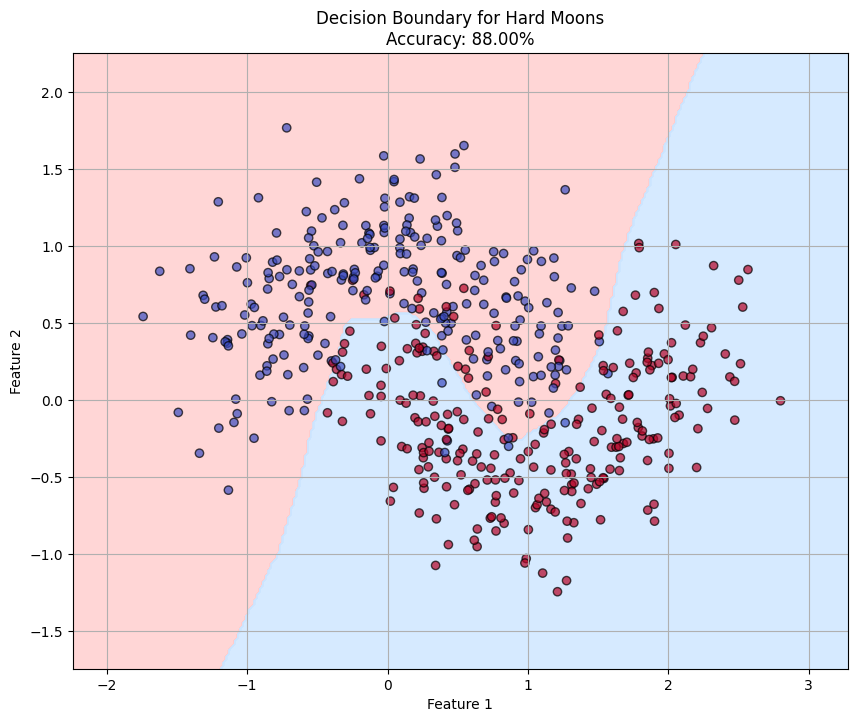

In [29]:
# Helper function to plot the decision boundary
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(10, 8))
    h = .02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    cmap_light = ListedColormap(['#FFCCCC', '#CCE5FF'])
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.7)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Plot the final result
plot_decision_boundary(model, X, y, f'Decision Boundary for Hard Moons\nAccuracy: {accuracy*100:.2f}%')